<a href="https://colab.research.google.com/github/MattyGraham10/ml-customer-churn-task-final/blob/main/DEPTCustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing data & libraries**

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('/content/Vodafone_Customer_Churn_Sample_Dataset.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Initial EDA**

In [ ]:
print(df.info())
print(df.shape)
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce')
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df = df.dropna(subset=['TotalCharges'])
df = df.drop(['gender'], axis = 1) #This was done with hindsight after EDA - spotted gender played little role

In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce')
df.isnull().sum()

,0
customerID,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
print(df.isnull().values.any())

False


In [ ]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df = df.drop(['customerID'], axis = 1)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category'])
unique_counts = categorical_cols.nunique()
print(unique_counts)

Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64


In [ ]:
for col in categorical_cols.columns:
    print(f"\nColumn: {col}")
    print(f"Unique count: {categorical_cols[col].nunique()}")
    print(f"Unique values: {categorical_cols[col].unique()}")



Column: Partner
Unique count: 2
Unique values: ['Yes' 'No']

Column: Dependents
Unique count: 2
Unique values: ['No' 'Yes']

Column: PhoneService
Unique count: 2
Unique values: ['No' 'Yes']

Column: MultipleLines
Unique count: 3
Unique values: ['No phone service' 'No' 'Yes']

Column: InternetService
Unique count: 3
Unique values: ['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity
Unique count: 3
Unique values: ['No' 'Yes' 'No internet service']

Column: OnlineBackup
Unique count: 3
Unique values: ['Yes' 'No' 'No internet service']

Column: DeviceProtection
Unique count: 3
Unique values: ['No' 'Yes' 'No internet service']

Column: TechSupport
Unique count: 3
Unique values: ['No' 'Yes' 'No internet service']

Column: StreamingTV
Unique count: 3
Unique values: ['No' 'Yes' 'No internet service']

Column: StreamingMovies
Unique count: 3
Unique values: ['No' 'Yes' 'No internet service']

Column: Contract
Unique count: 3
Unique values: ['Month-to-month' 'One year' 'Two year']

Column: Paperl

**Adding new feature - more possible**

In [ ]:
service_cols = [
    "PhoneService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"
]

# Convert Yes/No to 1/0 and sum across the columns for each row
df["NumberOfServices"] = df[service_cols].apply(lambda row: (row == "Yes").sum(), axis=1)

In [ ]:
numeric_cols = ['tenure', 'MonthlyCharges', 'NumberOfServices', 'TotalCharges']
df[numeric_cols].describe()

,tenure,MonthlyCharges,NumberOfServices,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2.941411,2283.300441
std,24.545260,30.085974,1.843695,2266.771362
min,1.000000,18.250000,0.000000,18.800000
25%,9.000000,35.587500,1.000000,401.450000
50%,29.000000,70.350000,3.000000,1397.475000
75%,55.000000,89.862500,4.000000,3794.737500
max,72.000000,118.750000,7.000000,8684.800000


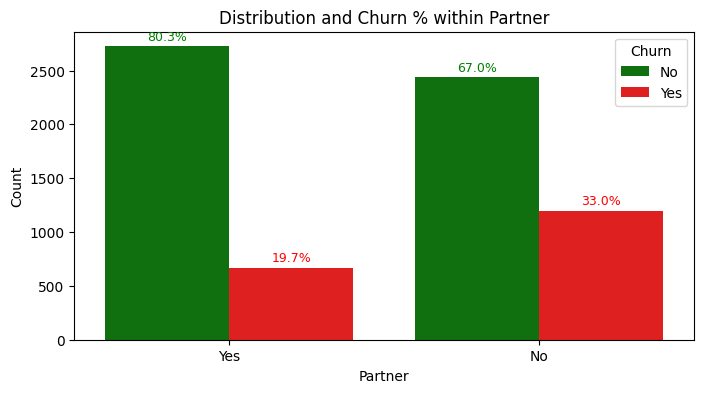

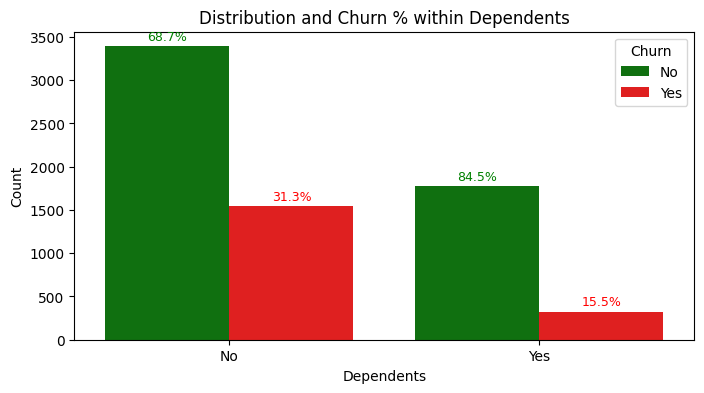

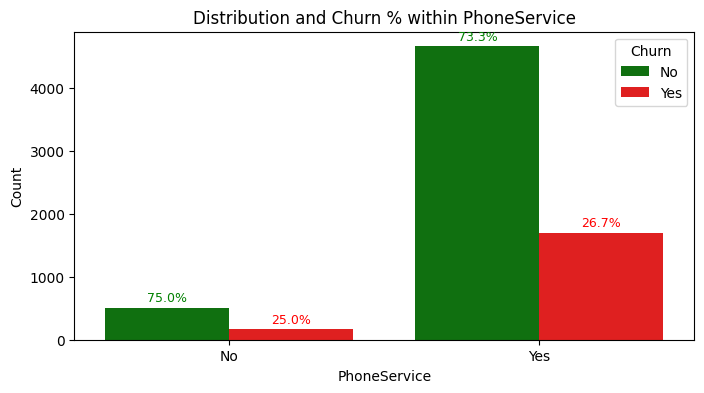

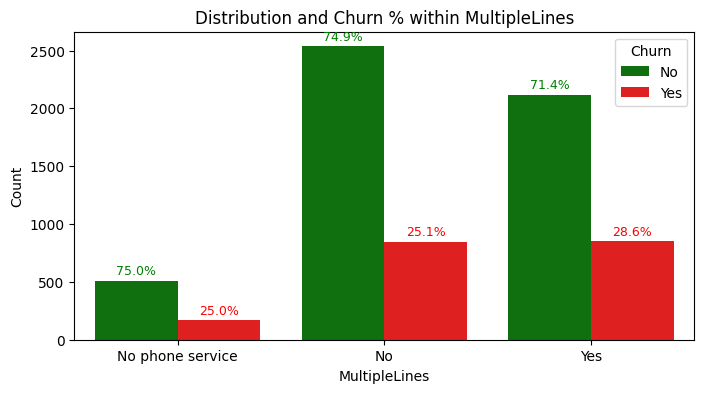

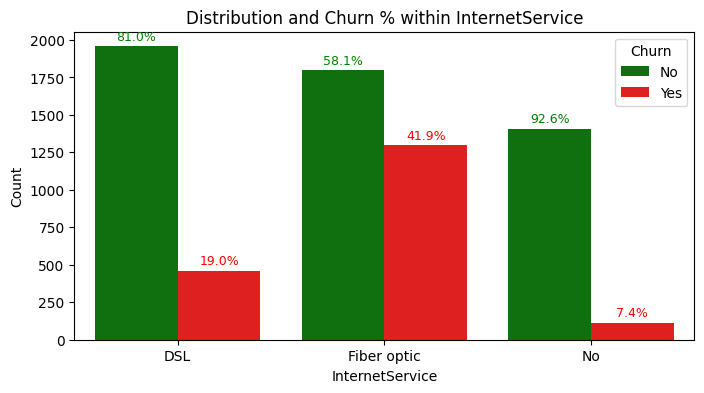

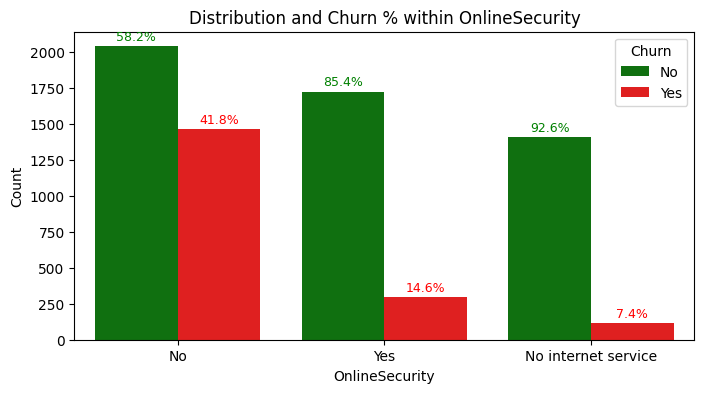

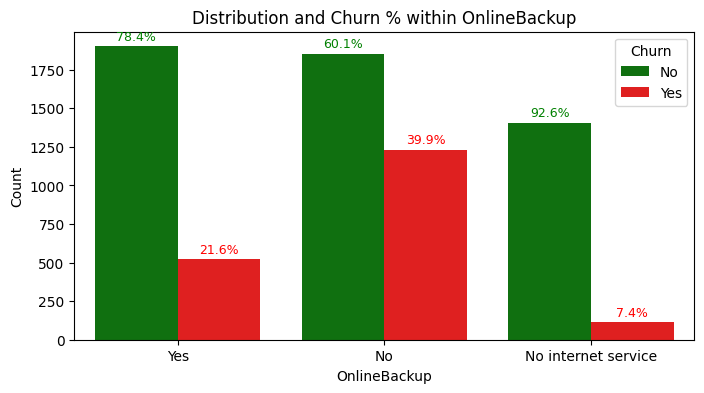

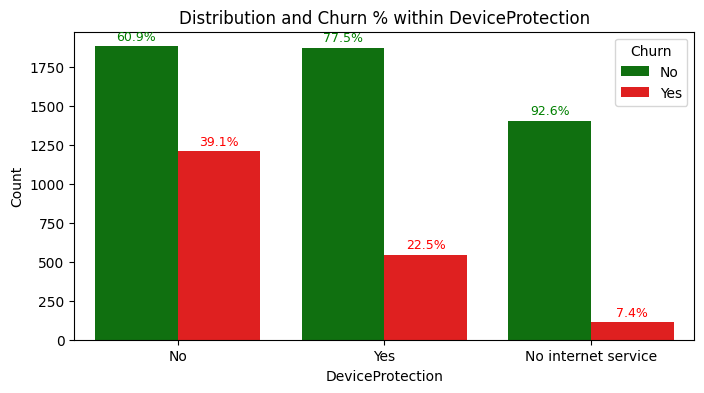

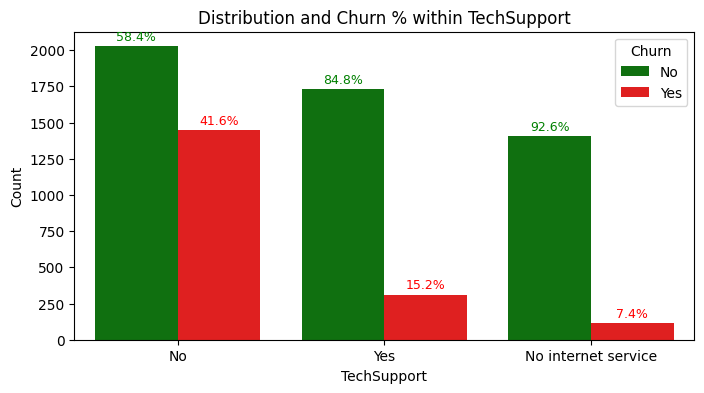

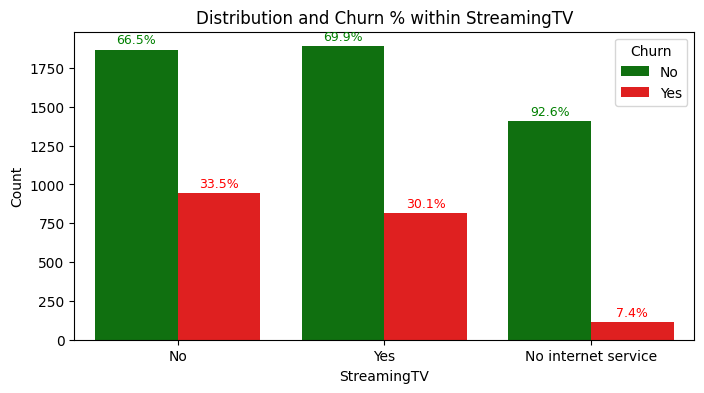

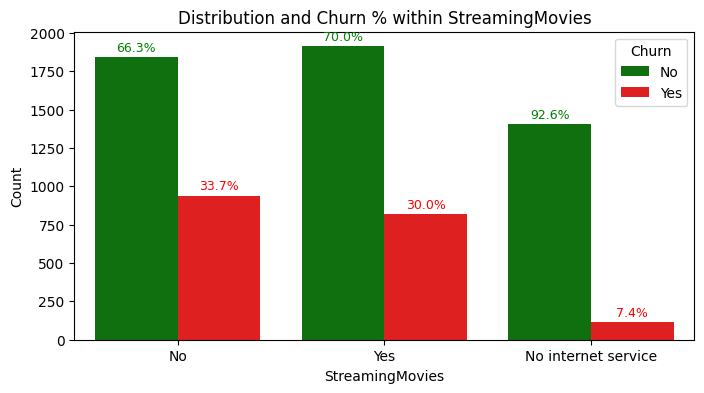

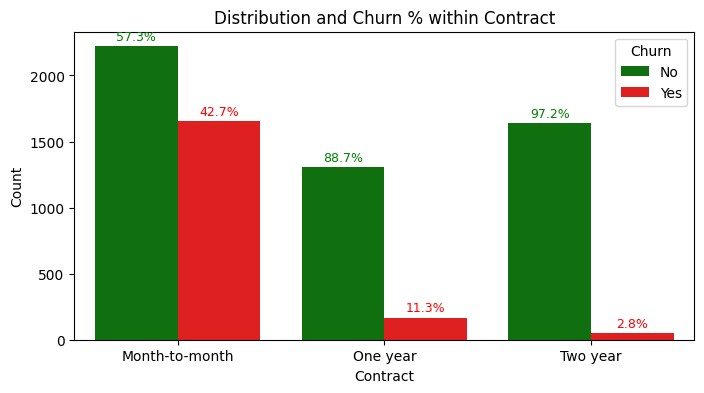

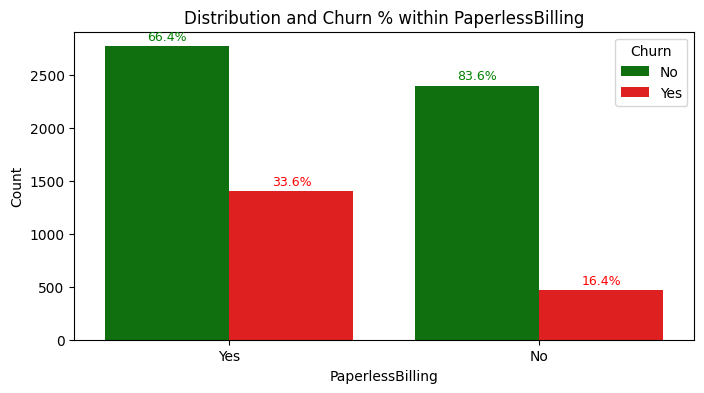

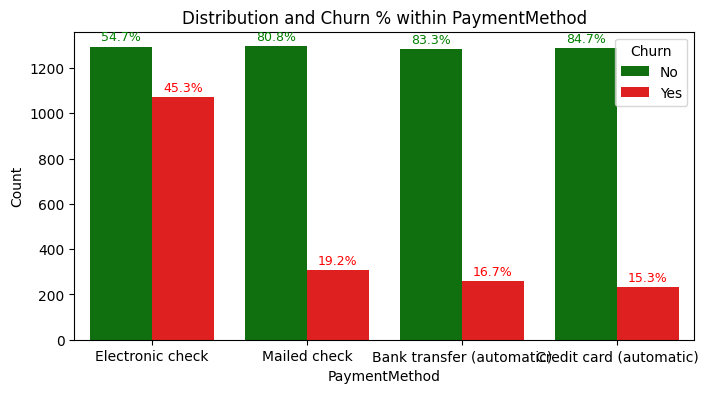

In [ ]:
palette = {'No': 'green', 'Yes': 'red'}

for col in categorical_cols.columns:
    if col == 'Churn':
        continue

    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=col, hue='Churn', palette=palette)

    categories = [tick.get_text() for tick in ax.get_xticklabels()]
    churn_classes = [t.get_text() for t in ax.legend_.get_texts()]
    n_hue = len(churn_classes)

    counts = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
    total_per_cat = counts.sum(axis=1)
    churn_pct = counts.divide(total_per_cat, axis=0) * 100

    cluster_width = 0.8
    bar_width = cluster_width / n_hue

    tick_positions = [tick.get_position()[0] for tick in ax.get_xticklabels()]

    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        height = p.get_height()

        if height == 0:
            continue

        category_index = int(np.argmin(np.abs(np.array(tick_positions) - x)))

        cluster_start = tick_positions[category_index] - cluster_width / 2
        relative_x = x - cluster_start

        hue_index = int(np.floor(relative_x / bar_width))
        if hue_index >= n_hue or category_index >= len(categories):
            continue

        category = categories[category_index]
        churn_class = churn_classes[hue_index]

        pct = churn_pct.loc[category, churn_class]

        color = palette[churn_class]

        ax.text(x, height + max(ax.get_ylim()) * 0.01, f'{pct:.1f}%',
                ha='center', va='bottom', fontsize=9, color=color)

    plt.title(f'Distribution and Churn % within {col}')
    plt.ylabel('Count')
    plt.show()

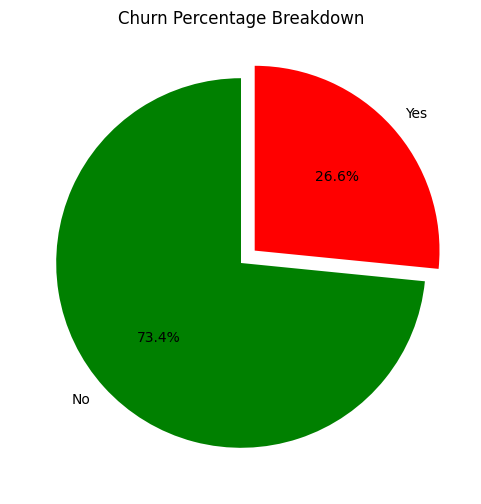

In [ ]:
plt.figure(figsize=(6,6))
df['Churn'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=['green', 'red'], startangle=90,
    labels=['No', 'Yes'], explode=[0, 0.1]
)
plt.title('Churn Percentage Breakdown')
plt.ylabel('')  # Hide y-label for cleaner look
plt.show()

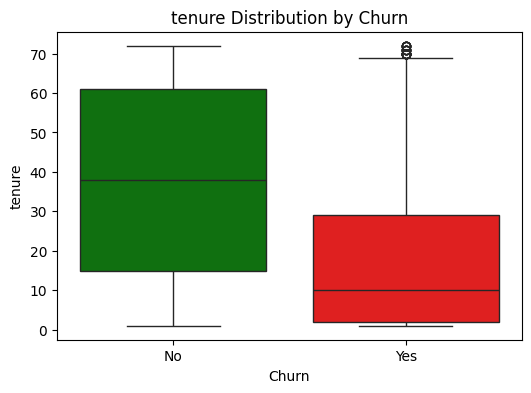

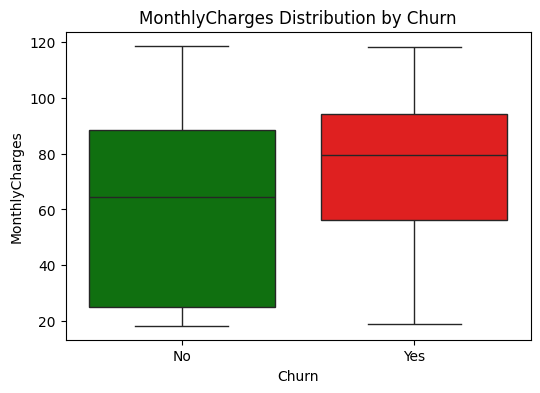

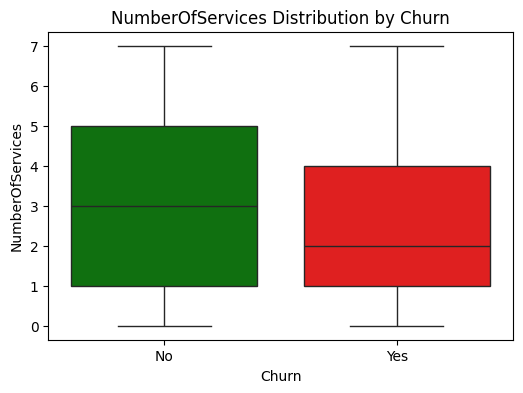

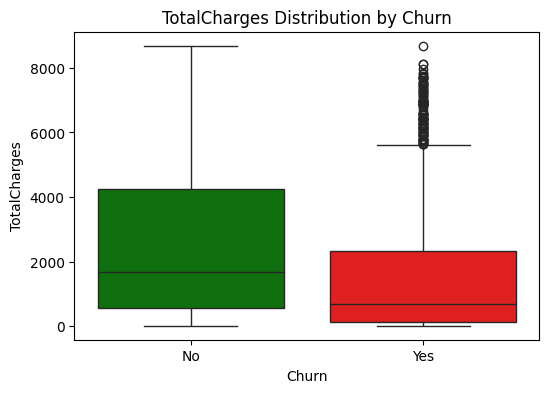

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Churn', y=col, palette={'No': 'green', 'Yes': 'red'})
    plt.title(f'{col} Distribution by Churn')
    plt.show()

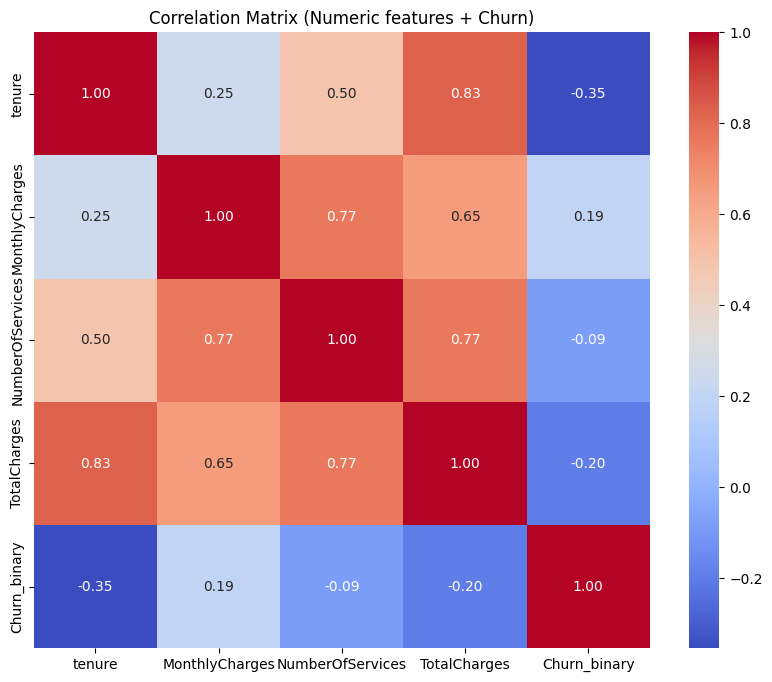

In [ ]:
df['Churn_binary'] = df['Churn'].map({'No': 0, 'Yes': 1})

cols_for_corr = numeric_cols + ['Churn_binary']
corr_matrix = df[cols_for_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix (Numeric features + Churn)')
plt.show()

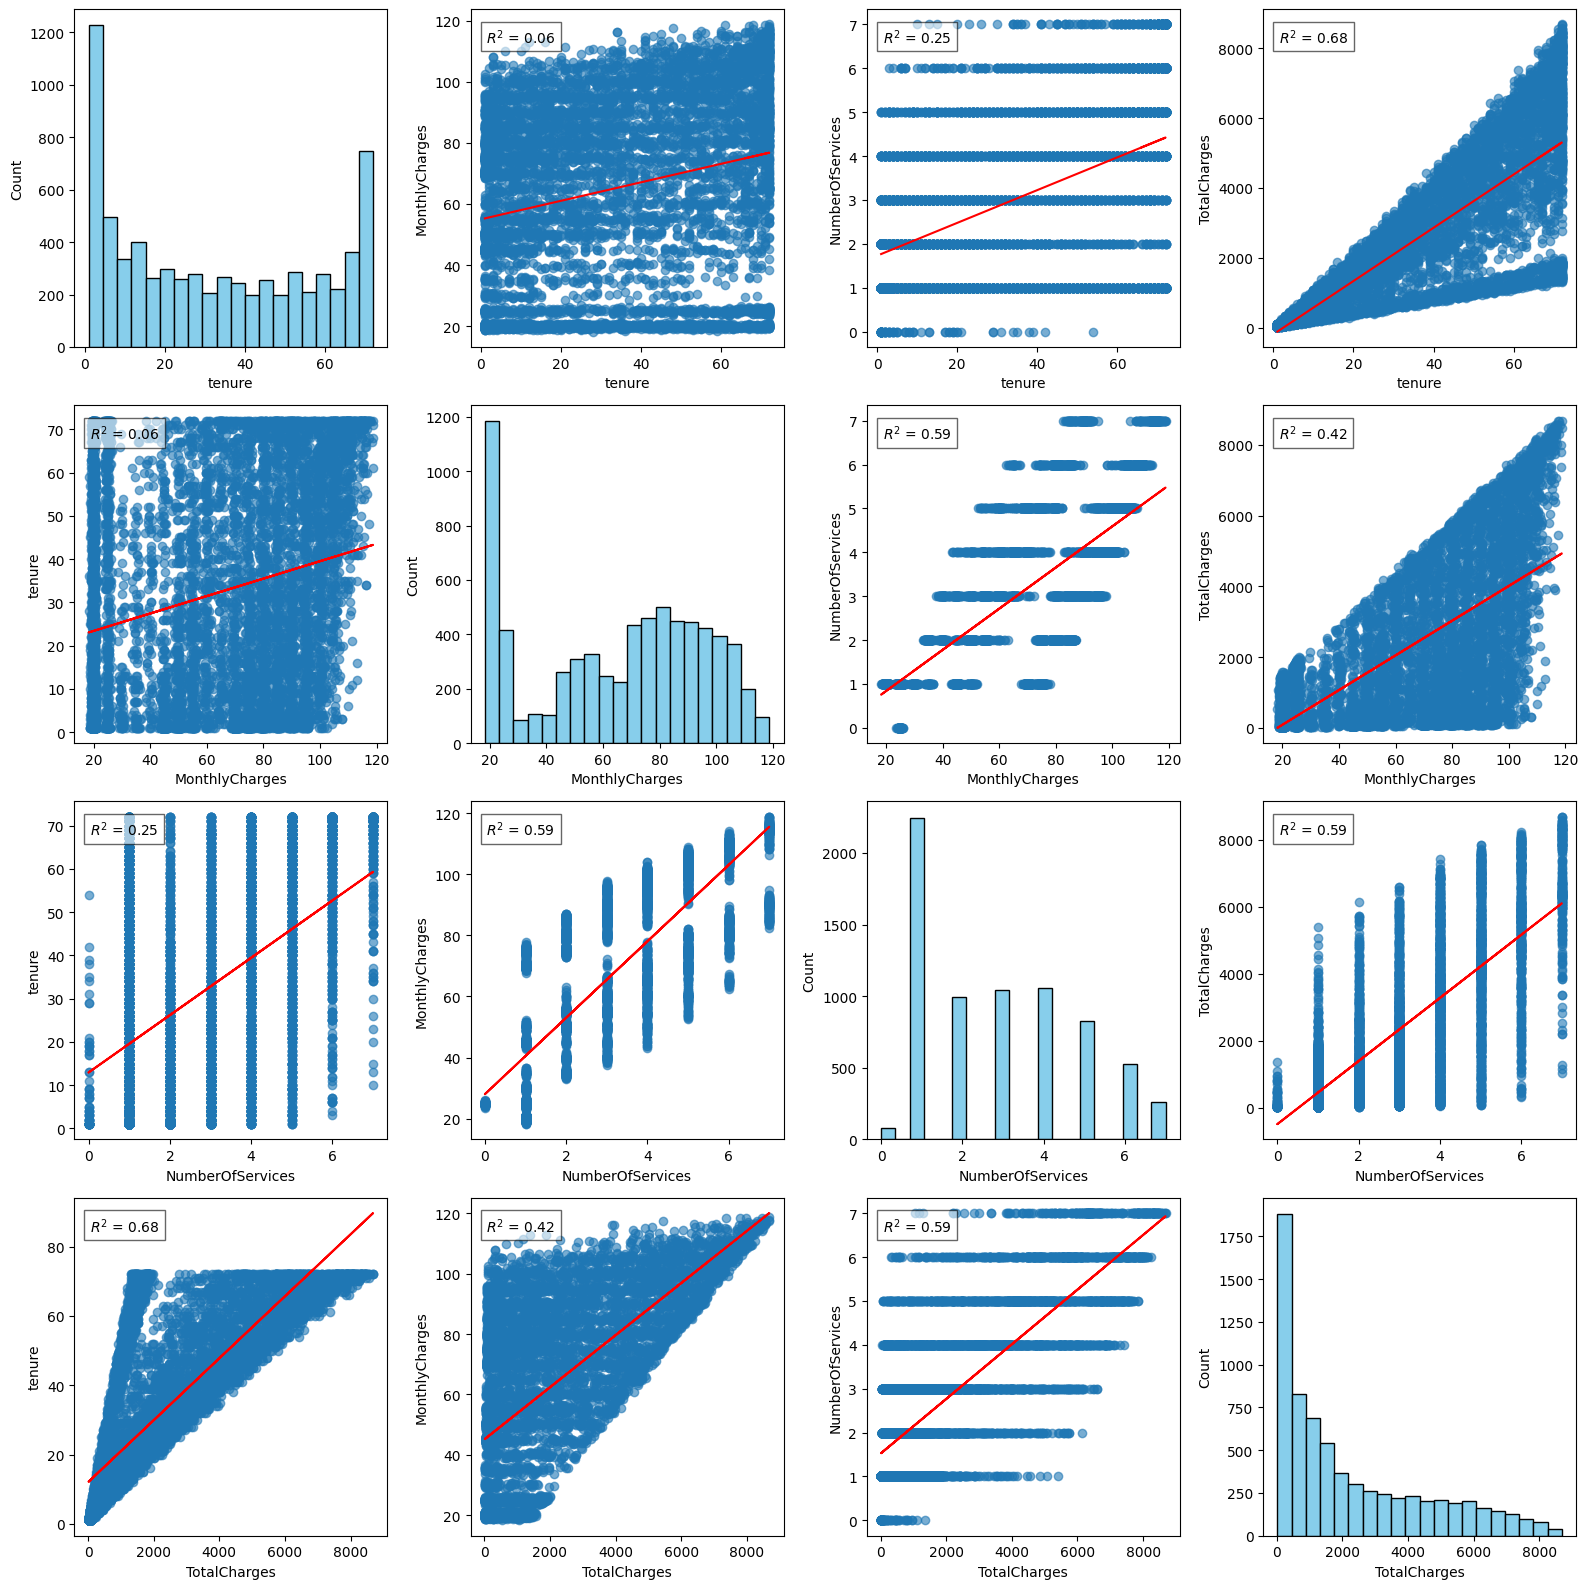

In [ ]:
def plot_scatter_with_r2(x, y, ax):
    ax.scatter(x, y, alpha=0.6)

    x_reshaped = x.values.reshape(-1, 1)
    y_values = y.values
    model = LinearRegression().fit(x_reshaped, y_values)
    y_pred = model.predict(x_reshaped)

    ax.plot(x, y_pred, color='red')

    r2 = model.score(x_reshaped, y_values)

    ax.text(0.05, 0.9, f'$R^2$ = {r2:.2f}', transform=ax.transAxes, fontsize=10,
            bbox=dict(facecolor='white', alpha=0.6))

    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)

num_cols = len(numeric_cols)
fig, axs = plt.subplots(num_cols, num_cols, figsize=(4*num_cols, 4*num_cols))

for i, col_x in enumerate(numeric_cols):
    for j, col_y in enumerate(numeric_cols):
        ax = axs[i, j]
        if i == j:
            ax.hist(df[col_x], bins=20, color='skyblue', edgecolor='black')
            ax.set_xlabel(col_x)
            ax.set_ylabel('Count')
        else:
            plot_scatter_with_r2(df[col_x], df[col_y], ax)

plt.tight_layout()
plt.show()

In [ ]:
for col in categorical_cols.columns:
    print(f"Column: {col}")
    value_counts = df[col].value_counts(normalize=True) * 100
    for val, pct in value_counts.items():
        print(f"  {val}: {pct:.2f}%")
    print()

Column: Partner
  No: 51.75%
  Yes: 48.25%

Column: Dependents
  No: 70.15%
  Yes: 29.85%

Column: PhoneService
  Yes: 90.33%
  No: 9.67%

Column: MultipleLines
  No: 48.14%
  Yes: 42.19%
  No phone service: 9.67%

Column: InternetService
  Fiber optic: 44.03%
  DSL: 34.36%
  No: 21.62%

Column: OnlineSecurity
  No: 49.73%
  Yes: 28.65%
  No internet service: 21.62%

Column: OnlineBackup
  No: 43.90%
  Yes: 34.49%
  No internet service: 21.62%

Column: DeviceProtection
  No: 44.00%
  Yes: 34.39%
  No internet service: 21.62%

Column: TechSupport
  No: 49.37%
  Yes: 29.01%
  No internet service: 21.62%

Column: StreamingTV
  No: 39.95%
  Yes: 38.44%
  No internet service: 21.62%

Column: StreamingMovies
  No: 39.55%
  Yes: 38.84%
  No internet service: 21.62%

Column: Contract
  Month-to-month: 55.11%
  Two year: 23.96%
  One year: 20.93%

Column: PaperlessBilling
  Yes: 59.27%
  No: 40.73%

Column: PaymentMethod
  Electronic check: 33.63%
  Mailed check: 22.81%
  Bank transfer (automat

**Data Preprocessing & Model Building, Evaluating Performance Metrics**

In [ ]:
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling"
]

multi_cat_cols = [
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "PaymentMethod"
]

ordinal_cols = ["Contract"]


In [ ]:
class BinaryMapper(BaseEstimator, TransformerMixin):
    def __init__(self, mapping_dict):
        self.mapping_dict = mapping_dict

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col, mapping in self.mapping_dict.items():
            X[col] = X[col].map(mapping)
        return X

    def get_feature_names_out(self, input_features=None):
        if input_features is not None:
            return input_features
        else:
            return list(self.mapping_dict.keys())

binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling"]
multi_cat_cols = [
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaymentMethod"
]
ordinal_cols = ["Contract"]
numeric_cols = ["tenure", "MonthlyCharges", "NumberOfServices", "TotalCharges"]

binary_mappings = {
    "Partner": {"No": 0, "Yes": 1},
    "Dependents": {"No": 0, "Yes": 1},
    "PhoneService": {"No": 0, "Yes": 1},
    "PaperlessBilling": {"No": 0, "Yes": 1}
}


contract_categories = [["Month-to-month", "One year", "Two year"]]

preprocessor = ColumnTransformer(
    transformers=[
        ("binary", BinaryMapper(binary_mappings), binary_cols),
        ("multi_cat", OneHotEncoder(handle_unknown="ignore"), multi_cat_cols),
        ("contract_ord", OrdinalEncoder(categories=contract_categories), ordinal_cols),
        ("num_scaler", StandardScaler(), numeric_cols)
    ],
    remainder="drop"
)

In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn'].map({'No': 0, 'Yes': 1})

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

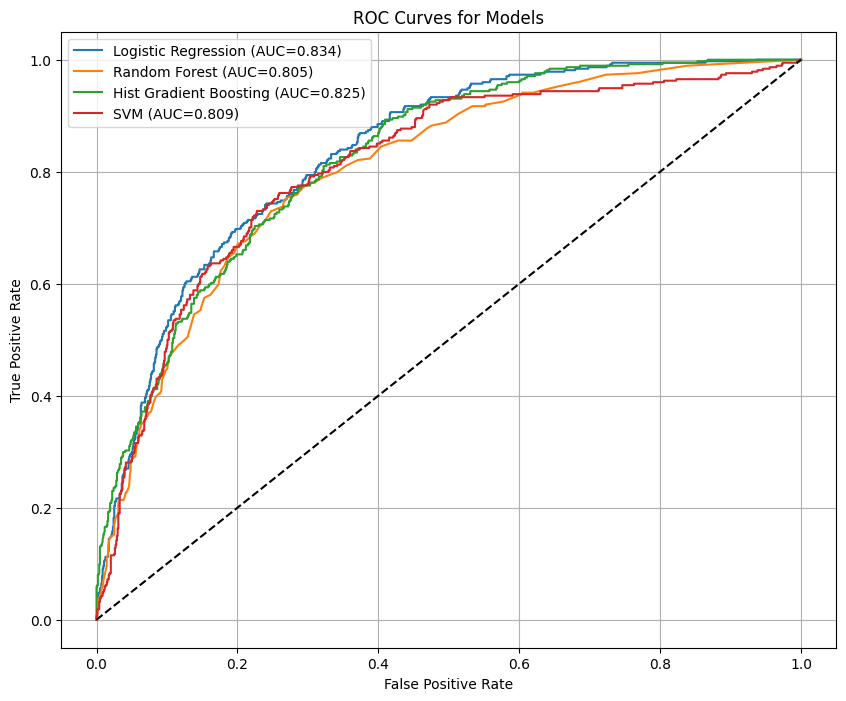

                    Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0     Logistic Regression  0.724236   0.488487  0.794118  0.604888  0.833974
1           Random Forest  0.781095   0.612245  0.481283  0.538922  0.804703
2  Hist Gradient Boosting  0.786780   0.612805  0.537433  0.572650  0.824826
3                     SVM  0.727079   0.491525  0.775401  0.601660  0.809280


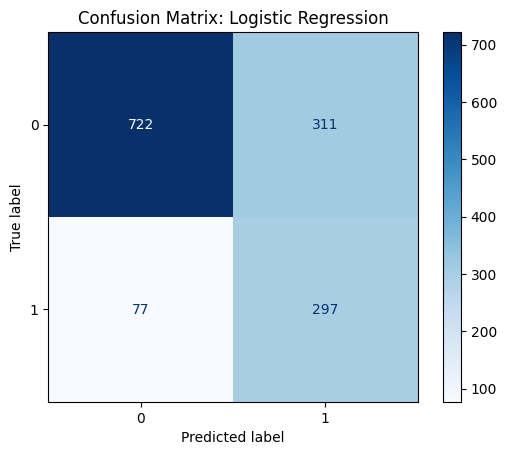

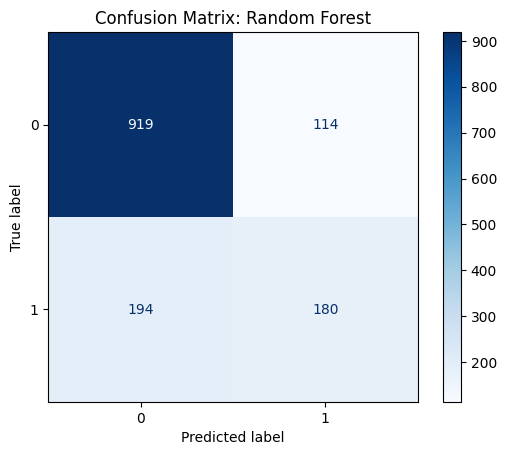

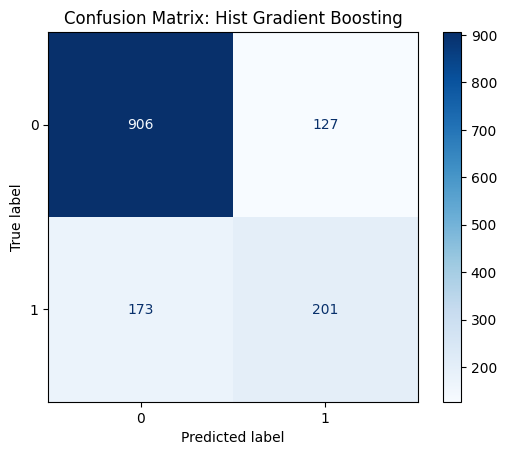

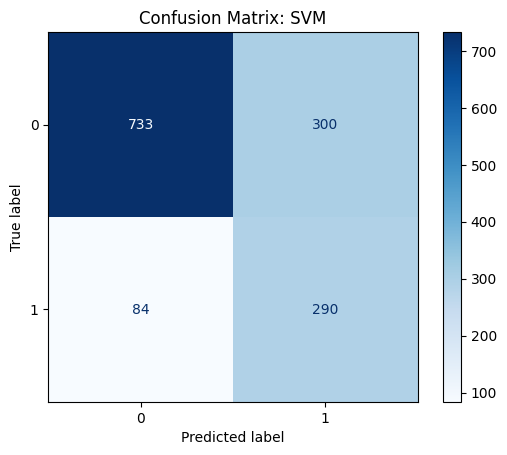

In [ ]:
import pandas as pd

results = []

plt.figure(figsize=(10, 8))

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("classifier", model)
    ])
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_val)
    probas = pipeline.predict_proba(X_val)[:, 1]

    acc = accuracy_score(y_val, preds)
    prec = precision_score(y_val, preds)
    rec = recall_score(y_val, preds)
    f1 = f1_score(y_val, preds)
    auc = roc_auc_score(y_val, probas)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC-AUC": auc
    })

    fpr, tpr, _ = roc_curve(y_val, probas)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Models")
plt.legend()
plt.grid(True)
plt.show()

results_df = pd.DataFrame(results)
print(results_df)

for entry in results:
    name = entry["Model"]
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("classifier", models[name])
    ])
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_val)

    cm = confusion_matrix(y_val, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

In [ ]:
import pandas as pd

X_train_transformed = preprocessor.transform(X_train)

feature_names = preprocessor.get_feature_names_out()

df_train_transformed = pd.DataFrame(X_train_transformed, columns=feature_names)

df_train_transformed.head()

,binary__Partner,binary__Dependents,binary__PhoneService,binary__PaperlessBilling,multi_cat__MultipleLines_No,multi_cat__MultipleLines_No phone service,multi_cat__MultipleLines_Yes,multi_cat__InternetService_DSL,multi_cat__InternetService_Fiber optic,multi_cat__InternetService_No,...,multi_cat__StreamingMovies_Yes,multi_cat__PaymentMethod_Bank transfer (automatic),multi_cat__PaymentMethod_Credit card (automatic),multi_cat__PaymentMethod_Electronic check,multi_cat__PaymentMethod_Mailed check,contract_ord__Contract,num_scaler__tenure,num_scaler__MonthlyCharges,num_scaler__NumberOfServices,num_scaler__TotalCharges
0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,1.321816,0.981556,1.108056,1.659900
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.267410,-0.971546,-0.521438,-0.562252
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,1.444064,0.837066,0.564891,1.756104
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,-1.204646,0.641092,0.021727,-0.908326
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.669826,-0.808787,-0.521438,-0.101561


In [ ]:
results_df.head(10)

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.724236,0.488487,0.794118,0.604888,0.833974
1,Random Forest,0.781095,0.612245,0.481283,0.538922,0.804703
2,Hist Gradient Boosting,0.786780,0.612805,0.537433,0.572650,0.824826
3,SVM,0.727079,0.491525,0.775401,0.601660,0.809280


**EXTRA - k fold CV, feature selection using SHAP**

Evaluating Logistic Regression with 5-Fold CV...


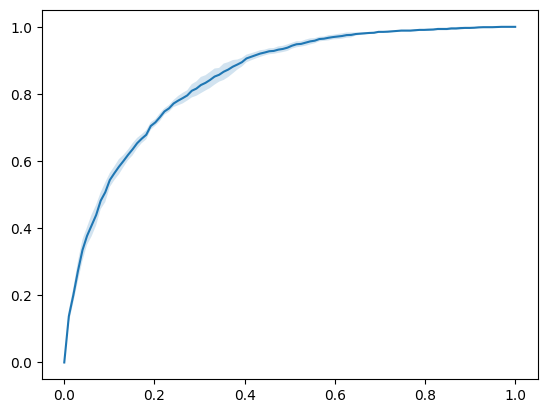

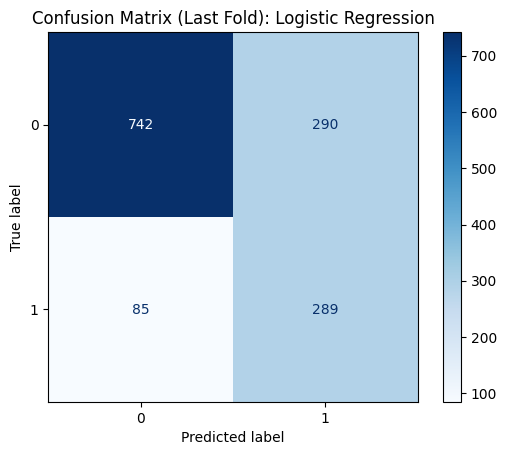

Evaluating Random Forest with 5-Fold CV...


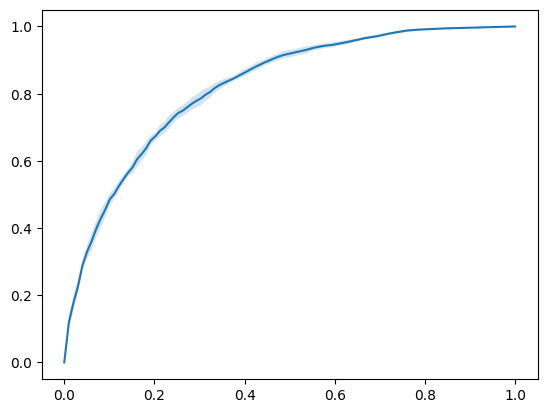

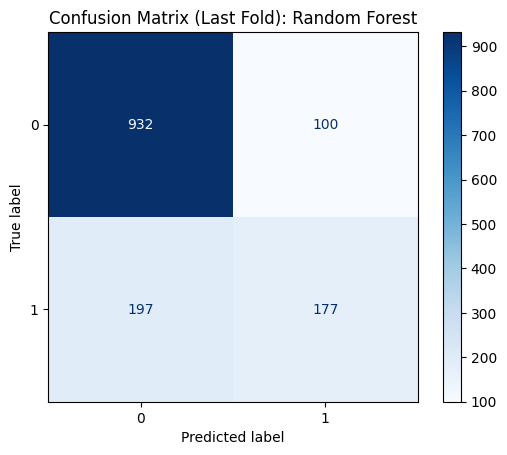

Evaluating Hist Gradient Boosting with 5-Fold CV...


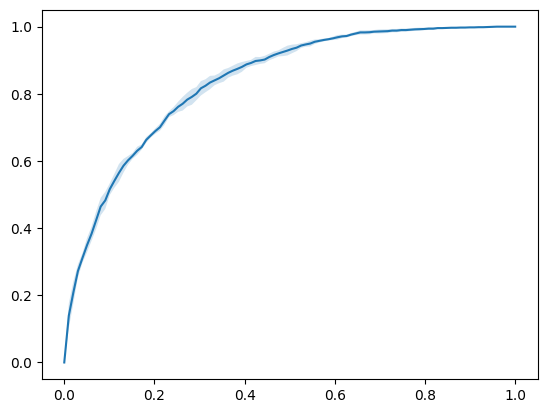

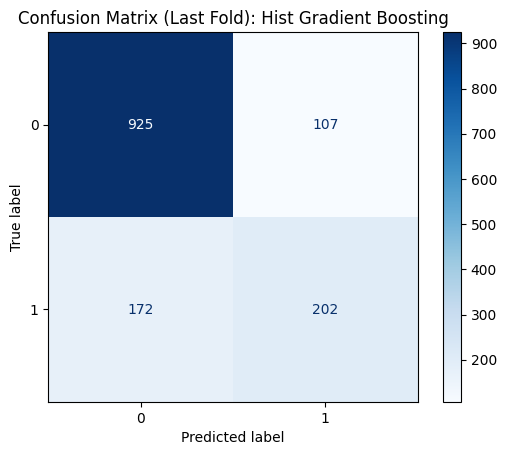

Evaluating SVM with 5-Fold CV...


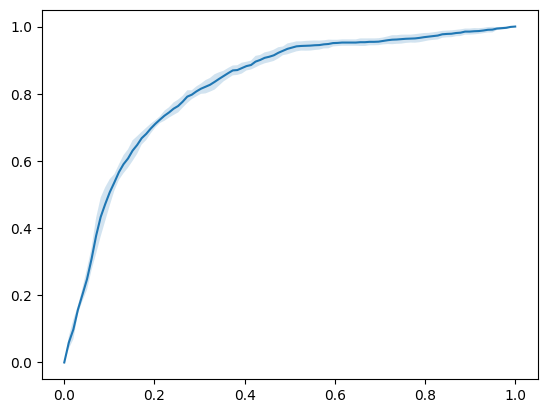

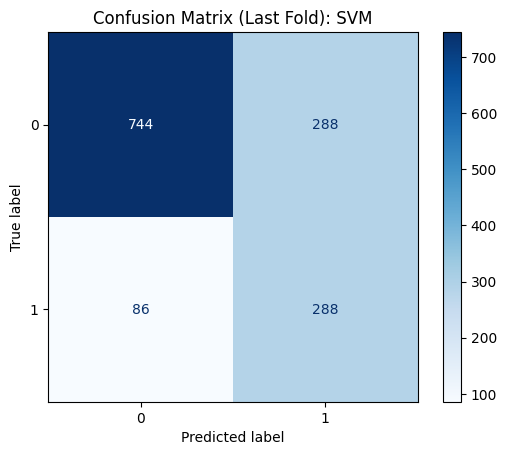

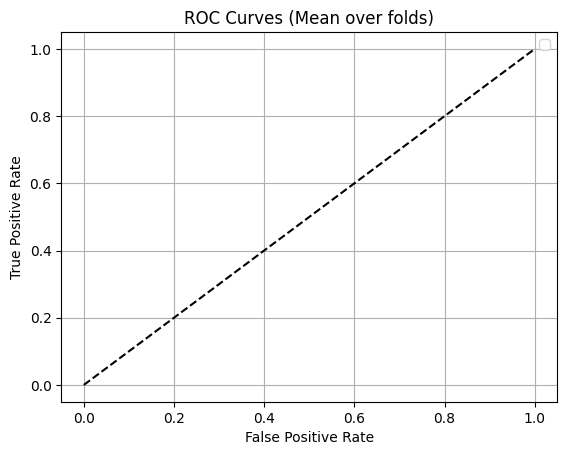

                    Model  Accuracy Mean  Accuracy Std  Precision Mean  \
0     Logistic Regression       0.745305      0.007567        0.513500   
1           Random Forest       0.787684      0.004388        0.633552   
2  Hist Gradient Boosting       0.796074      0.006310        0.640774   
3                     SVM       0.745449      0.007840        0.514036   

   Precision Std  Recall Mean  Recall Std   F1 Mean    F1 Std  ROC-AUC Mean  \
0       0.009296     0.797227    0.014854  0.624615  0.010280      0.845134   
1       0.011521     0.477256    0.008963  0.544389  0.009566      0.820862   
2       0.018118     0.531301    0.008097  0.580762  0.008688      0.836678   
3       0.010065     0.782245    0.014481  0.620310  0.009385      0.822957   

   ROC-AUC Std  
0     0.002991  
1     0.004044  
2     0.004569  
3     0.007178  


In [ ]:
import pandas as pd

results = []

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Evaluating {name} with 5-Fold CV...")

    accs, precs, recs, f1s, aucs = [], [], [], [], []
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []


    last_y_val, last_preds = None, None

    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), 1):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

        pipeline = Pipeline([
            ("preprocessing", preprocessor),
            ("classifier", model)
        ])

        pipeline.fit(X_train_fold, y_train_fold)
        preds = pipeline.predict(X_val_fold)
        probas = pipeline.predict_proba(X_val_fold)[:, 1]

        accs.append(accuracy_score(y_val_fold, preds))
        precs.append(precision_score(y_val_fold, preds))
        recs.append(recall_score(y_val_fold, preds))
        f1s.append(f1_score(y_val_fold, preds))
        aucs.append(roc_auc_score(y_val_fold, probas))

        fpr, tpr, _ = roc_curve(y_val_fold, probas)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)


        if fold == kf.n_splits:
            last_y_val, last_preds = y_val_fold, preds


    results.append({
        "Model": name,
        "Accuracy Mean": np.mean(accs),
        "Accuracy Std": np.std(accs),
        "Precision Mean": np.mean(precs),
        "Precision Std": np.std(precs),
        "Recall Mean": np.mean(recs),
        "Recall Std": np.std(recs),
        "F1 Mean": np.mean(f1s),
        "F1 Std": np.std(f1s),
        "ROC-AUC Mean": np.mean(aucs),
        "ROC-AUC Std": np.std(aucs),
    })


    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    std_tpr = np.std(tprs, axis=0)

    plt.plot(mean_fpr, mean_tpr, label=f"{name} (AUC={np.mean(aucs):.3f})")
    plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, alpha=0.2)


    cm = confusion_matrix(last_y_val, last_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (Last Fold): {name}")
    plt.show()

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Mean over folds)")
plt.legend()
plt.grid(True)
plt.show()
results_df = pd.DataFrame(results)
print(results_df)


In [ ]:
results_df.head(10)

,Model,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1 Mean,F1 Std,ROC-AUC Mean,ROC-AUC Std
0,Logistic Regression,0.745305,0.007567,0.513500,0.009296,0.797227,0.014854,0.624615,0.010280,0.845134,0.002991
1,Random Forest,0.787684,0.004388,0.633552,0.011521,0.477256,0.008963,0.544389,0.009566,0.820862,0.004044
2,Hist Gradient Boosting,0.796074,0.006310,0.640774,0.018118,0.531301,0.008097,0.580762,0.008688,0.836678,0.004569
3,SVM,0.745449,0.007840,0.514036,0.010065,0.782245,0.014481,0.620310,0.009385,0.822957,0.007178


In [ ]:
import numpy as np
import pandas as pd

def get_feature_names_from_column_transformer(column_transformer):
    feature_names = []

    for name, transformer, columns in column_transformer.transformers_:
        if name == 'remainder':
            continue
        if hasattr(transformer, 'get_feature_names_out'):

            try:
                names = transformer.get_feature_names_out(columns)
            except TypeError:

                names = transformer.get_feature_names_out()
        elif hasattr(transformer, 'get_feature_names'):
            names = transformer.get_feature_names(columns)
        else:

            names = columns
        feature_names.extend(names)

    return feature_names

feature_names = get_feature_names_from_column_transformer(preprocessor)


print(f"Number of features from transformer: {len(feature_names)}")
print(f"Number of features in SHAP values: {shap_values.shape[1]}")

assert len(feature_names) == shap_values.shape[1], "Feature names count and SHAP values dimension must match!"


shap_df = pd.DataFrame({
    "feature": feature_names,
    "importance": np.abs(shap_values).mean(axis=0)
})


shap_df = shap_df.sort_values(by="importance", ascending=False)

Number of features from transformer: 37
Number of features in SHAP values: 37


In [ ]:
import numpy as np
import pandas as pd

mean_abs_shap = np.abs(shap_values).mean(axis=0)

shap_importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": mean_abs_shap
}).sort_values(by="importance", ascending=False)

print(shap_importance_df)


                                    feature  importance
34                           MonthlyCharges    1.117660
33                                   tenure    0.587154
36                             TotalCharges    0.539690
35                         NumberOfServices    0.505006
9                        InternetService_No    0.331005
8               InternetService_Fiber optic    0.264401
25                       StreamingMovies_No    0.126517
4                          MultipleLines_No    0.124860
28  PaymentMethod_Bank transfer (automatic)    0.122259
31               PaymentMethod_Mailed check    0.114625
2                              PhoneService    0.113090
5            MultipleLines_No phone service    0.111102
11       OnlineSecurity_No internet service    0.109488
20          TechSupport_No internet service    0.100979
23          StreamingTV_No internet service    0.075686
26      StreamingMovies_No internet service    0.074029
24                          StreamingTV_Yes    0

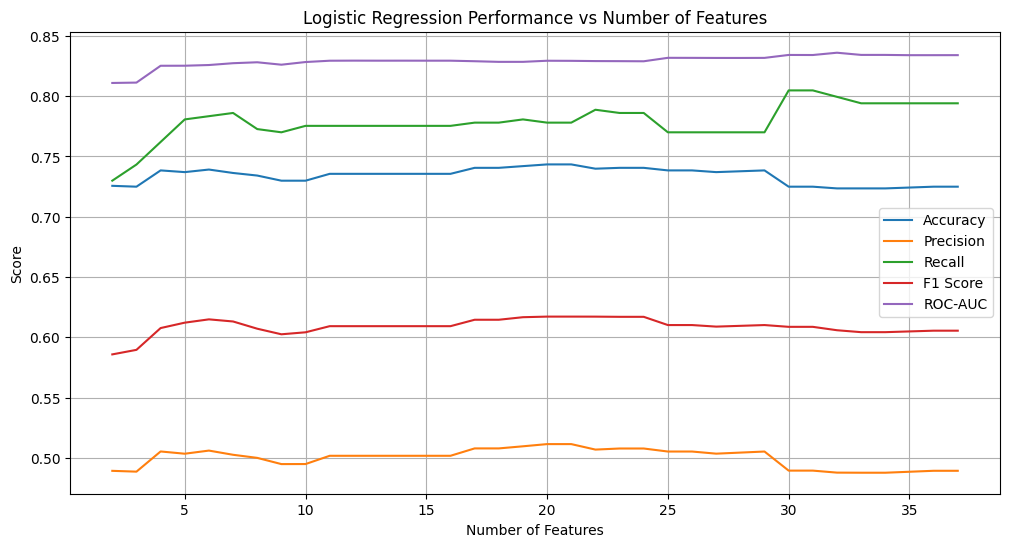

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling"]
multi_cat_cols = [
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaymentMethod"
]
ordinal_cols = ["Contract"]
numeric_cols = ["tenure", "MonthlyCharges", 'NumberOfServices', "TotalCharges"]


feature_names = []
feature_names.extend(binary_cols)

ohe = preprocessor.named_transformers_['multi_cat']
ohe_feature_names = ohe.get_feature_names_out(multi_cat_cols)
feature_names.extend(ohe_feature_names)


feature_names.extend(ordinal_cols)
feature_names.extend(numeric_cols)


X_train_transformed = preprocessor.transform(X_train)
X_val_transformed = preprocessor.transform(X_val)


def select_transformed_features(X_trans, selected_feats, all_feats):
    indices = [all_feats.index(feat) for feat in selected_feats]
    return X_trans[:, indices]


sorted_features = shap_importance_df['feature'].tolist()


results = []

for i in range(2, len(sorted_features)+1):
    selected_feats = sorted_features[:i]

    X_train_sel = select_transformed_features(X_train_transformed, selected_feats, feature_names)
    X_val_sel = select_transformed_features(X_val_transformed, selected_feats, feature_names)

    model = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
    model.fit(X_train_sel, y_train)

    preds = model.predict(X_val_sel)
    probas = model.predict_proba(X_val_sel)[:, 1]

    results.append({
        "n_features": i,
        "accuracy": accuracy_score(y_val, preds),
        "precision": precision_score(y_val, preds),
        "recall": recall_score(y_val, preds),
        "f1": f1_score(y_val, preds),
        "roc_auc": roc_auc_score(y_val, probas)
    })

df_results = pd.DataFrame(results)

plt.figure(figsize=(12, 6))
plt.plot(df_results['n_features'], df_results['accuracy'], label='Accuracy')
plt.plot(df_results['n_features'], df_results['precision'], label='Precision')
plt.plot(df_results['n_features'], df_results['recall'], label='Recall')
plt.plot(df_results['n_features'], df_results['f1'], label='F1 Score')
plt.plot(df_results['n_features'], df_results['roc_auc'], label='ROC-AUC')
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.title("Logistic Regression Performance vs Number of Features")
plt.legend()
plt.grid(True)
plt.show()